In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r'D:\Sem 5\ML LABS\Lab08\CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_columns)
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Categorical columns: Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [8]:
df_num = df.copy(deep=True)

In [9]:
df_num.drop(columns=categorical_columns, inplace=True, errors='ignore')


In [10]:
df_num.drop(columns=['car_ID'],inplace=True)

In [11]:
Y = df_num['price']
df_num.drop(columns=['price'],inplace=True)
X = df_num

In [12]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)

r2 = r2_score(y_test,y_pred)

In [14]:

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

print(f"r2 Accuracy: {r2} \n mae: {mae} \n mse : {mse}")

r2 Accuracy: 0.8181239192410075 
 mae: 2680.429983159391 
 mse : 14358029.116948212


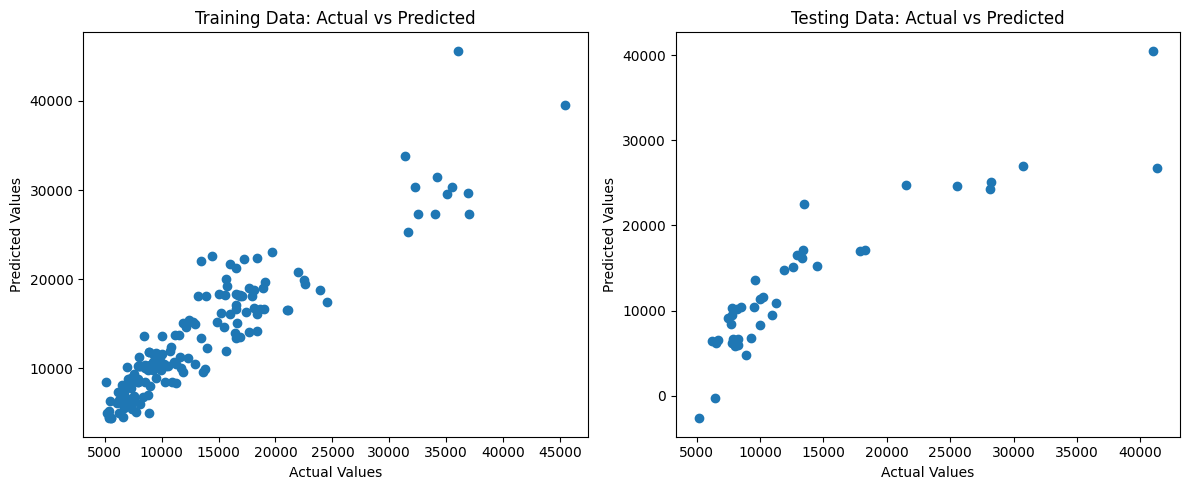

In [15]:


plt.figure(figsize=(12,5))

# Training Data Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Training Data: Actual vs Predicted")

# Testing Data Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Testing Data: Actual vs Predicted")

plt.tight_layout()
plt.show()


In [16]:
# Task 02

df2 = pd.read_csv(r'D:\Sem 5\ML LABS\Lab08\electricity_bill_dataset.csv') 

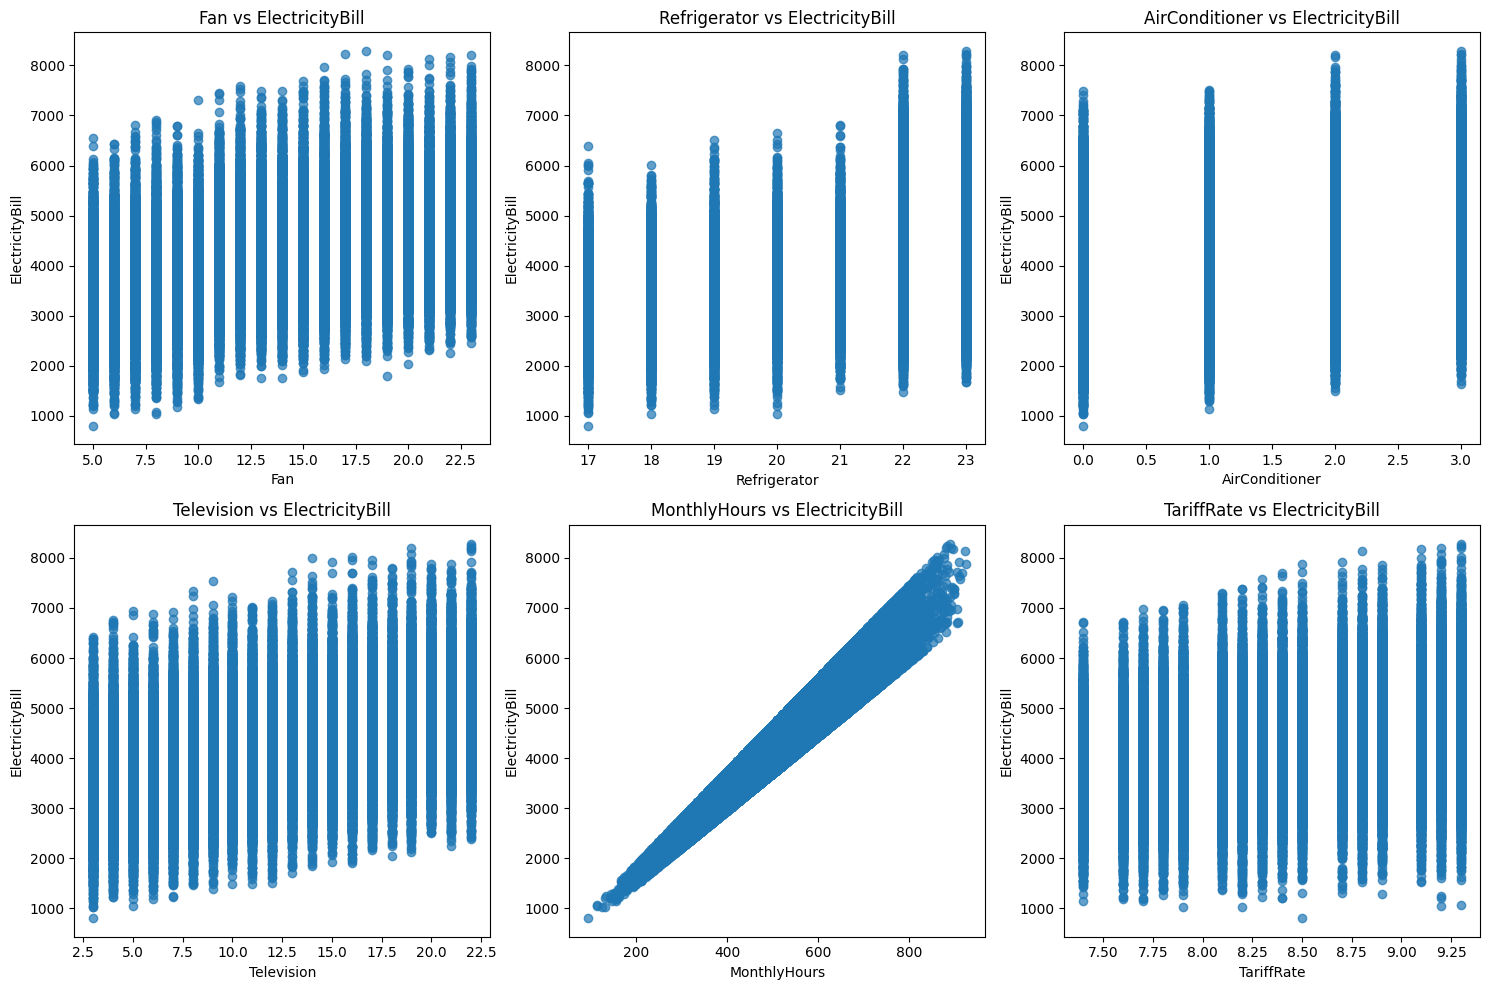

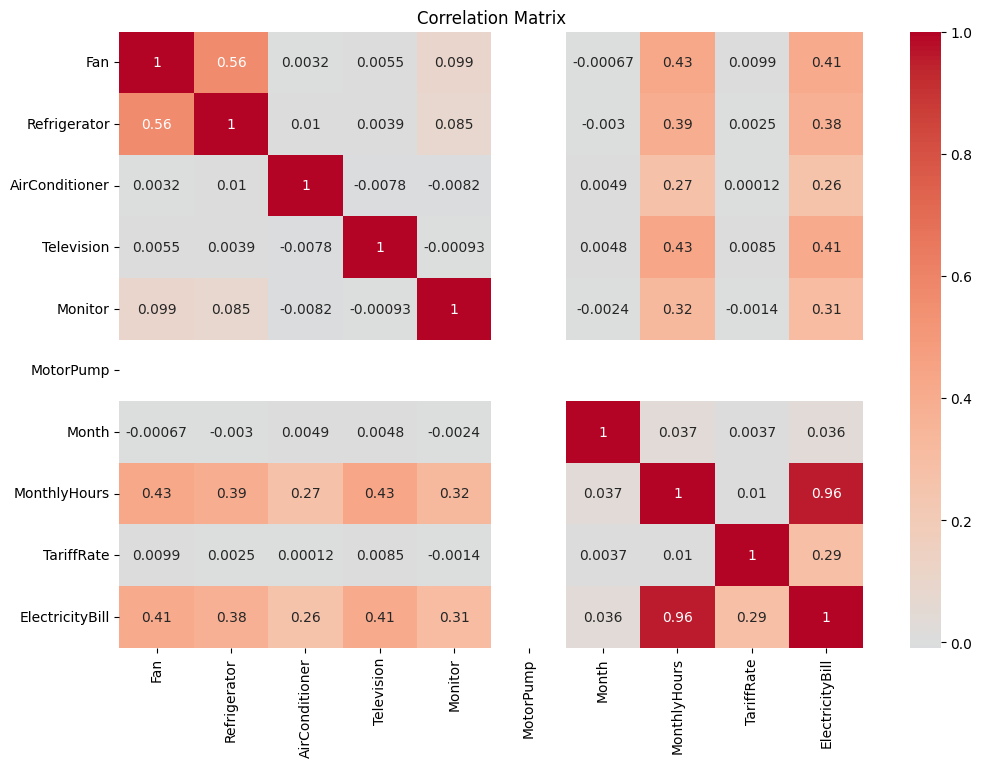


Model Performance:
R-squared: 0.9957
RMSE: 70.7659


In [ ]:
# Assumption 1: Linearity - Check relationships between features and target
plt.figure(figsize=(15, 10))

# Plot relationships between key features and ElectricityBill
features_to_check = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'MonthlyHours', 'TariffRate']

for i, feature in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df2[feature], df2['ElectricityBill'], alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('ElectricityBill')
    plt.title(f'{feature} vs ElectricityBill')

plt.tight_layout()
plt.show()


# Assumption 2: Check for multicollinearity
plt.figure(figsize=(12, 8))
correlation_matrix = df2.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


# Assumption 3: Fit a linear regression model and check residuals
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare features and target
X = df2[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'Month', 'MonthlyHours', 'TariffRate']]
y = df2['ElectricityBill']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"\nModel Performance:")
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

